# Mobile applications: Users segmentation based on behavior.

1. **Introduction**

* Overview of the Project: Explain the purpose and importance of the project.
* Goals and Objectives: Define what you aim to achieve with the user segmentation analysis.
* Data Description: Describe the datasets used in the analysis.

2.  **Data Loading and Preparation**

* Load Datasets: Load mobile_dataset_us.csv and mobile_sources_us.csv.
* Inspect and Clean the Data:
* Handle missing values and incorrect data types.
* Convert event.time to datetime format.
* Check for and handle duplicates.
* Merge Datasets: Merge the datasets for comprehensive analysis.
* Rename Columns: Standardize column names (e.g., replace periods with underscores).
* Event Name Cleanup:
    * Rename contact_show to show_contacts.
    * Consolidate search events (search_1, search_2, search_3, etc.) into a single search category.

3. **Exploratory Data Analysis (EDA)**

* Summary Statistics: Generate descriptive statistics for the dataset.
* Data Visualization:
    * Distribution of Events Over Time: Visualize how events are distributed over time.
    * User Activity Distribution: Plot the number of events per user.
    * Source Distribution: Analyze the distribution of user sources.
Day of the Week Analysis: Visualize event distribution across different days of the week.
* Insights and Initial Observations: Highlight critical findings from the EDA.

4. ** User Segmentation**

* Define Segmentation Criteria: Based on user events and behavior, define the criteria for segmenting users.
* Segment Users: Apply k-means clustering to segment users into four distinct clusters..

5. **Hypothesis Testing**

* Formulate and Test Hypotheses:

    * Conversion Difference: Test the hypothesis about the difference in conversion rates for contact information views between users from Bing and Google.

* Statistical Tests: Conduct statistical tests (e.g., t-tests, chi-square tests) to validate the hypotheses.
* Interpretation of Results: Interpret the test results and derive conclusions.

6. **Conclusions abd Recommendations**

## 1. Introduction

This project, with the potential to significantly impact our user experience and engagement, aims to analyze users' actions in the application to define groups that differ in product metrics (retention rate, time spent in the application, frequency of event occurrence, conversion on the target event, contacts_show `).

Throughout the project, we will:

- Carry out exploratory data analysis
- Segments users based on the events they complete
- Test statistical hypotheses
    - Formulate and test a hypothesis about the difference in conversion in contact information views between those who downloaded the app from `bing` and those who downloaded it from `google`.
    - Formulate a statistical hypothesis about the dataset data and test it.

**Data Description**

The datasets contain data about events in the Trash to Treasure mobile app, where users post ads to sell things they no longer need.

The data corresponds to those who took their first actions in the application after October 7, 2019.

`mobile_dataset_us.csv` contains the following columns:

- `event.time`: when the event took place
- `event.name`
- `user.id`

`mobile_sources_us.csv` contains the following columns:

- `userId`: user ID
- `source`: the source from which the user downloaded the application

Event details:

- `advert_open`: open an advertising post
- `photos_show`: see photos in the ad
- `tips_show`:  the user was shown recommended ads
- `tips_click`: the user clicked on a recommended ad
- `contacts_show` and `show_contacts`: the user clicked the "show phone number" button in the ad
- `contacts_call`: the user dialed the announcement number
- `map`: the user opened the map of the published ads
- `search_1` - `search_7`: various events related to website search
- `favorites_add`: the user added the ad to favorites


## 2. Data Loading and Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:

# load datasets
mobile_dataset = pd.read_csv('mobile_dataset_us.csv')
mobile_sources = pd.read_csv('mobile_sources_us.csv')



In [ ]:
#display the first five rows of the each data set
mobile_dataset.head()


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [ ]:
mobile_sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [ ]:
#display basic information about data sets
mobile_dataset.info(), mobile_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


(None, None)

After loading and inspecting the datasets, we'll handle missing values and ensure data types are appropriate.

Next, let's merge the datasets for comprehensive analysis:

In [ ]:
# Merge datasets on user ID
merged_data = pd.merge(mobile_dataset, mobile_sources, left_on='user.id', right_on='userId')

# Drop the redundant userId column
merged_data.drop(columns=['userId'], inplace=True)

# Display the first few rows of the merged dataset
merged_data.head()
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
 3   source      74197 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [ ]:
merged_data.head()

,event.time,event.name,user.id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


Data Overview:

mobile_dataset_us.csv
- Columns: event.time, event.name, user.id
- Entries: 74,197
- Data Types: All columns are of type object

mobile_sources_us.csv
Columns: userId, source
Entries: 4,293
Data Types: Both columns are of type object

Merged Dataset
Columns: event.time, event.name, user.id, source
Entries: 74,197

In [ ]:
# Rename columns to replace periods with underscores
merged_data.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'}, inplace=True)

In [ ]:
# Check for missing values
merged_data.isnull().sum()


,0
event_time,0
event_name,0
user_id,0
source,0


In [ ]:
# Check for duplicates
merged_data.duplicated().sum()


0

In [ ]:
# Convert 'event_time' to datetime
merged_data['event_time'] = pd.to_datetime(merged_data['event_time'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Rename contact_show to show_contacts and combine all search events into a single 'search' category
merged_data['event_name'] = merged_data['event_name'].replace({
    'search_1': 'search',
    'search_2': 'search',
    'search_3': 'search',
    'search_4': 'search',
    'search_5': 'search',
    'search_6': 'search',
    'search_7': 'search',
    'contact_show': 'show_contacts'
})

In [ ]:
display(merged_data.head())

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


## 3. Exploratory Data Analysis

Let's see a summary of statistics to get an overview of the data

In [ ]:
merged_data.describe(include = 'all')

,event_time,event_name,user_id,source
count,74197,74197,74197,74197
unique,NaN,10,4293,3
top,NaN,tips_show,cb36854f-570a-41f4-baa8-36680b396370,bing
freq,NaN,40055,478,34286
mean,2019-10-21 15:32:09.039316992,NaN,NaN,NaN
min,2019-10-07 00:00:00.431357,NaN,NaN,NaN
25%,2019-10-14 22:04:27.791869952,NaN,NaN,NaN
50%,2019-10-22 00:26:56.715014912,NaN,NaN,NaN
75%,2019-10-28 12:35:53.023877120,NaN,NaN,NaN
max,2019-11-03 23:58:12.532487,NaN,NaN,NaN


Event Distribution:

The dataset contains a total of 74,197 events.
There are 16 unique event types, with tips_show being the most frequent event, occurring 40,055 times.
This suggests that viewing tips or recommendations is a common user action in the app.
User Activity:

The dataset includes 4,293 unique users.
The most active user (user_id cb36854f-570a-41f4-baa8-36680b396370) performed 478 events.
This indicates a significant disparity in user activity, with some users being much more active than others.

Source Distribution:

There are 3 unique sources from which users downloaded the app: Bing, Google, and others.
The majority of users (34,286 events) come from Bing.
This suggests that Bing is a significant source of user acquisition for the app.
Event Timing:

The events span from October 7, 2019, to November 3, 2019.
The mean event time is approximately October 21, 2019, indicating a fairly even distribution of events throughout the period.
The 25th, 50th, and 75th percentiles of event times further confirm a relatively uniform distribution of user activity over the month.

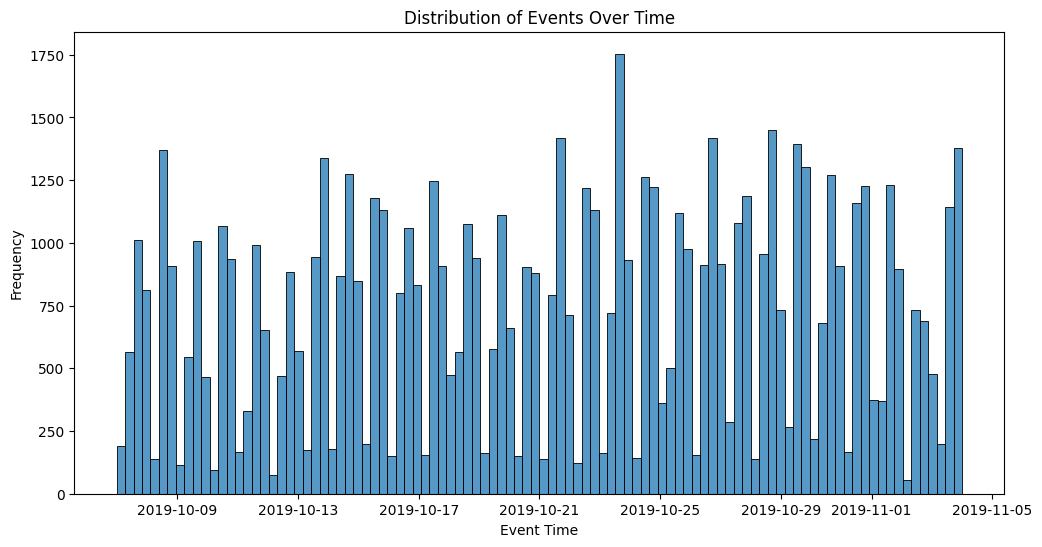

In [ ]:

# Distribution of Events Over Time
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['event_time'], bins=100, kde=False)
plt.title('Distribution of Events Over Time')
plt.xlabel('Event Time')
plt.ylabel('Frequency')
plt.show()



The chart shows a relatively consistent level of user activity throughout the month. There are regular peaks and troughs, but no prolonged periods of inactivity.
This consistency suggests a stable user base that interacts with the application regularly.

Weekly Patterns:

There appears to be a recurring pattern every few days, with noticeable peaks and dips. This could indicate weekly usage patterns, possibly reflecting user behavior tied to specific days of the week (e.g., weekends vs. weekdays).
Activity Peaks:

Some of the highest peaks in activity occur around October 8, October 27, October 29, and November 3.
These peaks could be associated with specific events or promotions within the app, or they might reflect natural variations in user activity. Investigating the causes of these peaks could provide insights into what drives higher engagement.

Mid-Month Increase:

There is a noticeable increase in activity starting around October 12 and continuing until around October 24. This mid-month surge could be related to particular marketing efforts, feature releases, or seasonal trends.


Let's check the distribution of events within users

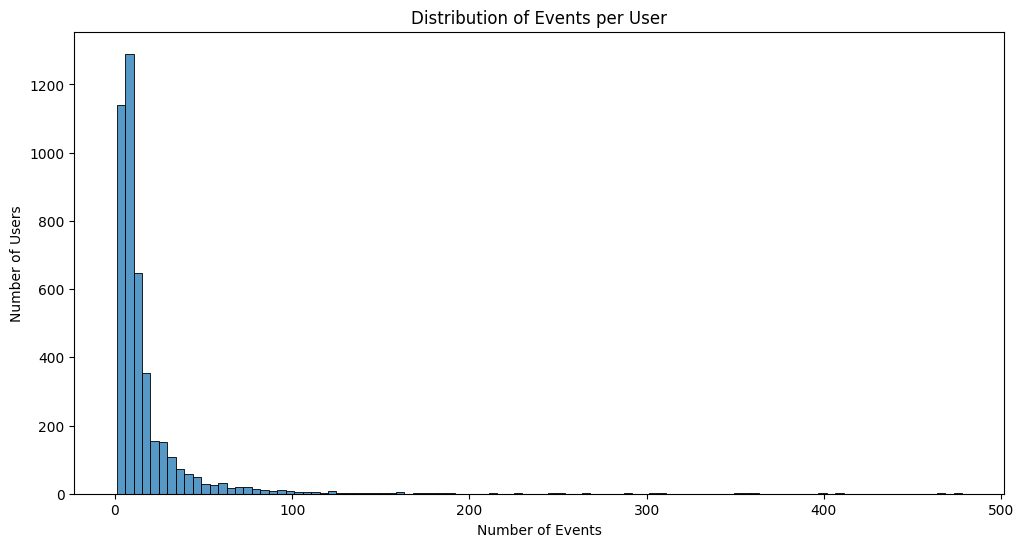

In [ ]:
# Distribution of Events per User
user_activity = merged_data['user_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(user_activity, bins=100, kde=False)
plt.title('Distribution of Events per User')
plt.xlabel('Number of Events')
plt.ylabel('Number of Users')
plt.show()



High Concentration of Low Activity Users:

The majority of users perform a relatively small number of events, with a steep drop-off as the number of events increases.
This indicates that most users are not highly active in terms of the number of interactions they have with the app.
Long Tail of Highly Active Users:

There is a long tail extending to the right, with a small number of users performing a very high number of events.
These highly active users, although fewer in number, could be significantly contributing to overall engagement and usage metrics



Let's take a look at source distribution:

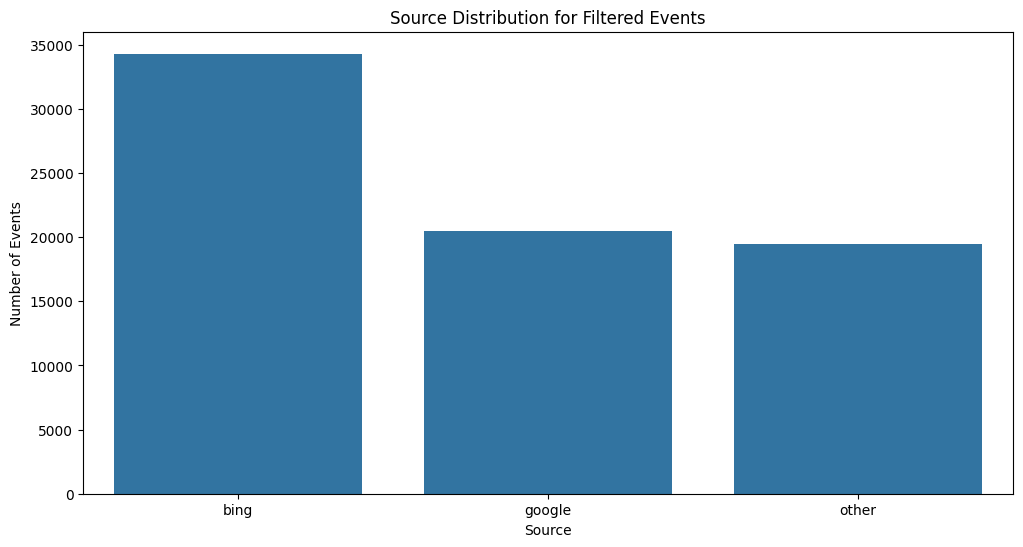

In [ ]:
# source distribution for filtered events
source_distribution = merged_data['source'].value_counts()

# Plot the distribution of sources for filtered events
plt.figure(figsize=(12, 6))
sns.barplot(x=source_distribution.index, y=source_distribution.values)
plt.title('Source Distribution for Filtered Events')
plt.xlabel('Source')
plt.ylabel('Number of Events')
plt.show()

Bing being the top source for user acquisition indicates that marketing efforts through Bing are effective. It might be beneficial to analyze why Bing outperforms other sources and whether those strategies can be replicated for Google and other sources.

Let's see how user activity throughout the week:


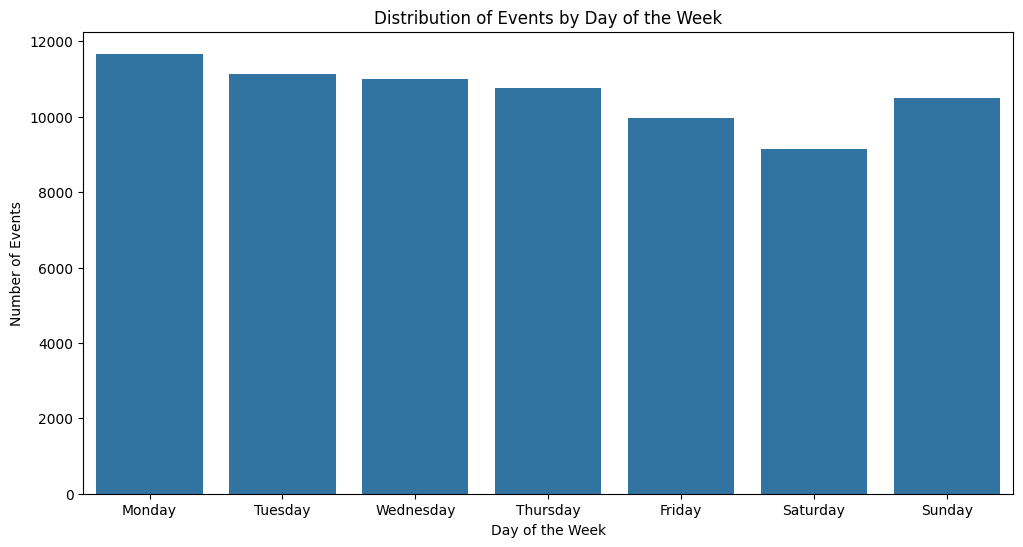

In [ ]:
# Create the 'day_of_week' column
merged_data['day_of_week'] = merged_data['event_time'].dt.day_name()

# Group by day of the week and count the number of events
events_per_day = merged_data['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot the distribution of events across the days of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=events_per_day.index, y=events_per_day.values)
plt.title('Distribution of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.show()

Monday shows the highest number of events, followed closely by Tuesday and Wednesday. This suggests that user engagement is slightly higher at the beginning of the week, potentially due to users being more active after the weekend. Tuesday, Wednesday, and Thursday maintain relatively high and consistent levels of activity. This consistency indicates steady user engagement during the middle of the week. Tuesday, Wednesday, and Thursday maintain relatively high and consistent levels of activity. This consistency indicates steady user engagement during the middle of the week.There is a noticeable increase in activity on Sunday, almost matching the levels seen on weekdays. This rebound suggests that users return to the app as they wind down their weekend and prepare for the upcoming week.

event_name
tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4450
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
show_contacts       79
Name: count, dtype: int64


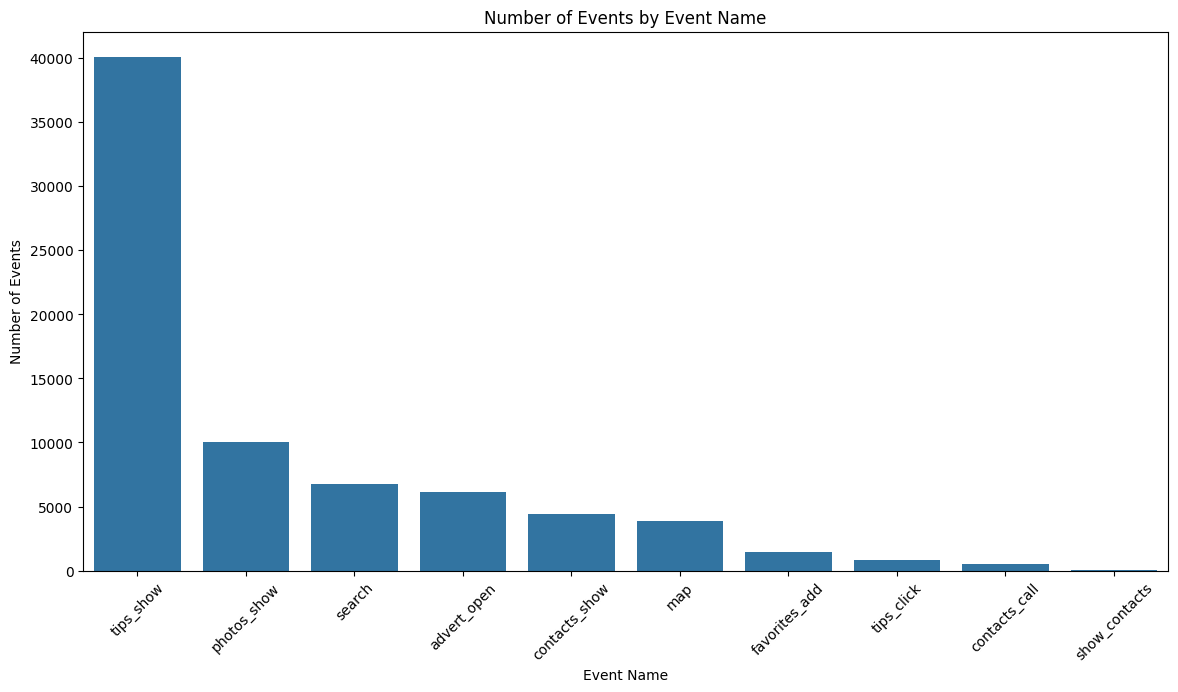

In [ ]:
# Count the number of occurrences of each event name
event_name_counts = merged_data['event_name'].value_counts()

# Display the counts
print(event_name_counts)

# Plot the distribution of event names
plt.figure(figsize=(14, 7))
sns.barplot(x=event_name_counts.index, y=event_name_counts.values)
plt.title('Number of Events by Event Name')
plt.xlabel('Event Name')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

* The tips_show event is by far the most common event, with nearly 40,000 ocurrences. This could mean that the feauture showing recommended ads to users is highly used and possibly a key element if user interaction within the app.

* The photos_show event (viewing photos in an ad) and the advert_open event (opening an ad post) are the next most frequent events, with photos_show having over 10,000 occurrences and advert_open having around 5,000 occurrences.
This suggests that users are actively browsing ads and engaging with the visual content, which is crucial for a marketplace app.

* The contacts_show and show_contacts events (clicking to show phone numbers) combined have a significant number of occurrences. This shows that many users are interested in reaching out to sellers, indicating healthy engagement with the ads.

* The map event, where users open the map of published ads, also shows notable usage, indicating that location-based browsing is a useful feature for users.

* Various search-related events (search_1 to search_7) collectively represent a substantial portion of the interactions. This indicates that users frequently utilize the search functionality to find specific items or ads.


Let's move on to daily active users over time

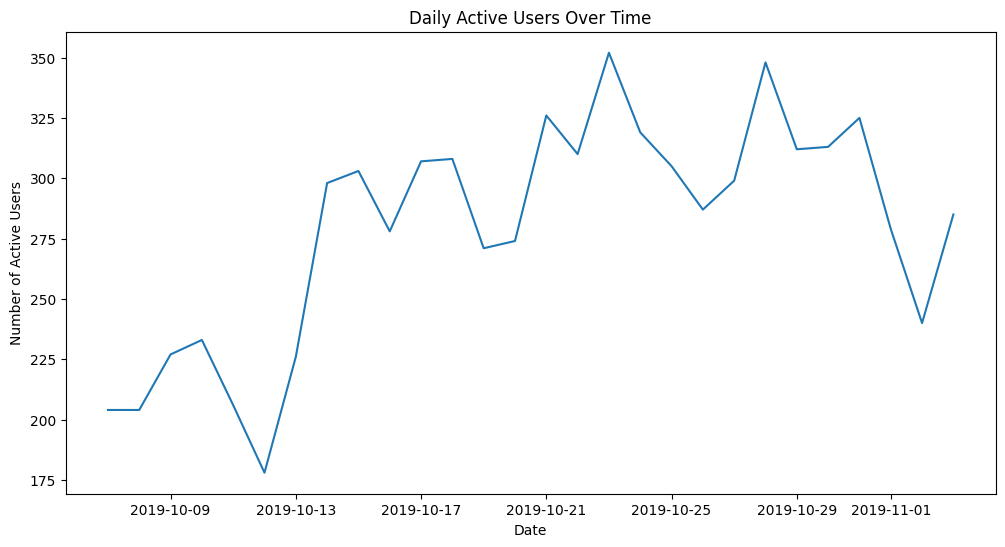

In [ ]:

retention_data = merged_data[['user_id', 'event_time']].drop_duplicates()
retention_data['event_date'] = retention_data['event_time'].dt.date

# Count the number of unique users by date
daily_users = retention_data.groupby('event_date')['user_id'].nunique()

# Plot the daily active users
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_users)
plt.title('Daily Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.show()


The chart displays the number of unique active users per day over the given time span.

General Trend:

There is a general upward trend in daily active users from the beginning of the period until around October 22.
After October 22, there is more variability, with fluctuations in the number of active users.

Initial Increase:

The number of active users starts at around 200 and increases steadily until around October 13.
This initial increase might be attributed to successful marketing campaigns, user acquisition strategies, or app updates that attracted more users.

Mid-Month Spike and Fluctuations:

There is a noticeable spike in daily active users around October 21, where the number reaches over 350.
Following this peak, the number of active users fluctuates but generally remains above 250 until the end of the month.

Late-Month Decline:

Towards the end of October, there is a decline in the number of active users, particularly noticeable on October 31 and November 1.

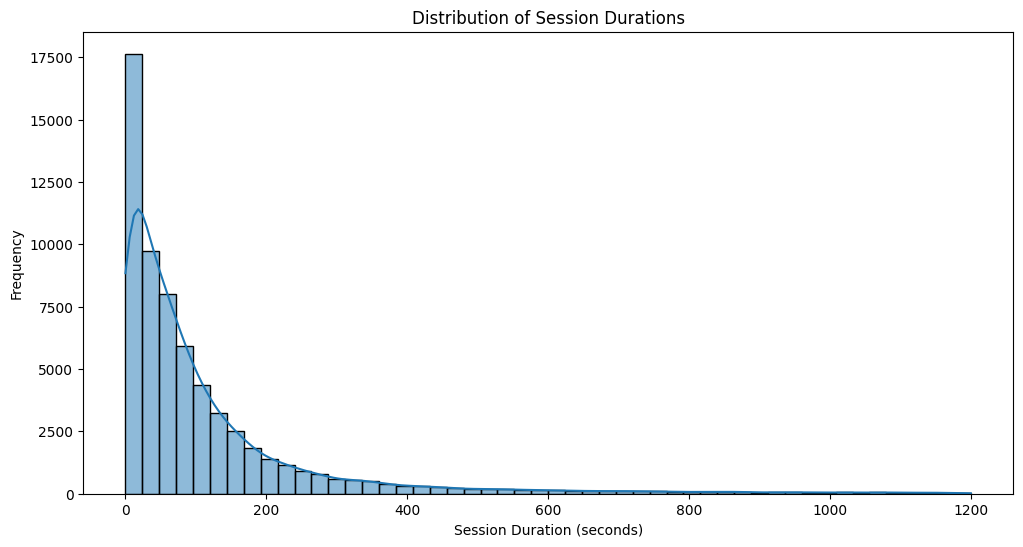

In [ ]:
# Calculate session duration for each user
merged_data['next_event_time'] = merged_data.groupby('user_id')['event_time'].shift(-1)
merged_data['session_duration'] = (merged_data['next_event_time'] - merged_data['event_time']).dt.total_seconds()

# Filter to sessions
session_threshold = 20 * 60
session_data = merged_data[merged_data['session_duration'] < session_threshold]

# Plot the distribution of session durations
plt.figure(figsize=(12, 6))
sns.histplot(session_data['session_duration'].dropna(), bins=50, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


The distribution of session durations reveals that most sessions are concise, with a significant peak at durations close to 0 seconds, indicating brief interactions likely for quick checks or initial exploration. The distribution is heavily right-skewed, showing that while most sessions are short, some users spend considerably more extended time in the app. The most common session duration is under 50 seconds, suggesting many users quickly check the app or exit shortly after opening it. There is a gradual decline in the frequency of session durations as the duration increases, indicating fewer users stay engaged for extended periods. Although rare, sessions extending to and beyond 1000 seconds (over 16 minutes) suggest that some users are deeply involved, possibly browsing extensively or performing multiple actions within the app.

We double check data range rates:

In [ ]:
# Calculate the range of dates in the dataset
earliest_date = merged_data['event_time'].min()
latest_date = merged_data['event_time'].max()
date_range = latest_date - earliest_date
total_days = date_range.days

# Display the earliest and latest dates, and the total number of days
print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Total number of days: {total_days}")

Earliest date: 2019-10-07 00:00:00.431357
Latest date: 2019-11-03 23:58:12.532487
Total number of days: 27


### User Retention

<ipython-input-24-4c00bf1aea53>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


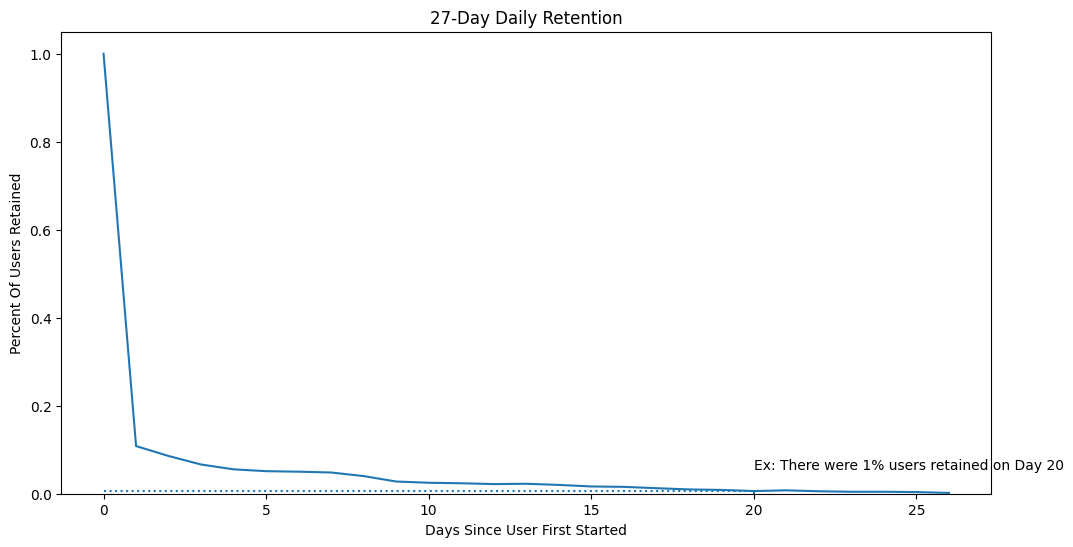

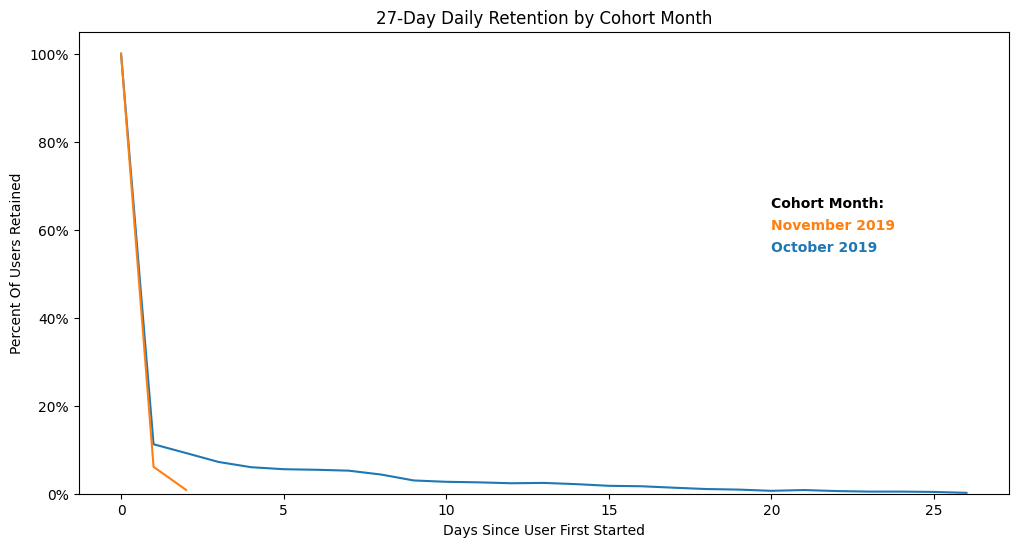

In [ ]:


# Extract unique user-event pairs and the first event date for each user
user_first_event = merged_data.groupby('user_id')['event_time'].min().reset_index()
user_first_event.rename(columns={'event_time': 'first_event_date'}, inplace=True)

# Merge the first event date back into the original data
merged_data_with_first_event = pd.merge(merged_data, user_first_event, on='user_id')

# Calculate the days since the first event for each event
merged_data_with_first_event['days_since_first_event'] = (
    merged_data_with_first_event['event_time'] - merged_data_with_first_event['first_event_date']
).dt.days

# Filter data to ensure we are looking at users who have had enough time to be retained
filtered_data = merged_data_with_first_event[merged_data_with_first_event['days_since_first_event'] <= 30]

# Calculate overall retention rates
overall_retention = filtered_data.groupby('days_since_first_event')['user_id'].nunique() / filtered_data['user_id'].nunique()

# Plot overall retention rates
plt.figure(figsize=(12, 6))
plt.plot(overall_retention)
plt.title("27-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0, 1.05)

# Highlight Day 20 retention if it exists within 27 days
if 20 in overall_retention.index:
    day_20_retention = overall_retention.loc[20]
    plt.hlines(y=day_20_retention, xmin=0, xmax=20, linestyles='dotted')
    plt.vlines(x=20, ymin=0, ymax=day_20_retention, linestyles='dotted')
    plt.text(s=f"Ex: There were {day_20_retention:.0%} users retained on Day 20", x=20, y=day_20_retention + .05)

# Cohort analysis by start month
filtered_data['start_month'] = filtered_data['first_event_date'].values.astype('datetime64[M]')
plt.figure(figsize=(12, 6))
legend_x = 20
legend_y = .55

for i, month in enumerate(filtered_data['start_month'].unique()):
    dfc = filtered_data[filtered_data['start_month'] == month]
    retention_cohort = dfc.groupby('days_since_first_event')['user_id'].nunique() / dfc['user_id'].nunique()
    p = plt.plot(retention_cohort)
    plt.text(s=pd.to_datetime(month).strftime('%B %Y'), c=p[0].get_color(),
             x=legend_x, y=legend_y + (.05 * i), weight='bold')

plt.text(s="Cohort Month:", x=legend_x, y=legend_y + (.05 * i) + .05, weight='bold')
plt.title("27-Day Daily Retention by Cohort Month")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0, 1.05)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.show()


Overall 27-Day Retention Rate

The first chart shows the overall 27-day retention rate for users. Key observations include:
Initial Drop: Retention sharply declines within the first day, dropping from 100% to below 20%. This suggests that a significant number of users do not return after their initial interaction with the app.
Gradual Decline: After the initial drop, the retention rate declines gradually over the next few days, stabilizing around 5% by day ten and remaining low for the rest of the 27 days.
Low Long-Term Retention: By day 20, retention rates are meager, around 1%. This indicates that only a tiny fraction of users remain active after three weeks.
Overall, the retention rate suggests challenges in keeping users engaged beyond their first few interactions with the app.


27-Day Retention by Cohort Month
The second chart breaks down the 27-day retention by cohort month (October 2019 and November 2019). Key insights include:
Consistent Initial Drop: Both cohorts exhibit a similar sharp decline in retention within the first day, dropping from 100% to below 20%. This reinforces the observation that many users do not return after their initial use.
Similar Retention Patterns: The retention patterns for both cohorts follow a similar trend, with a gradual decline in the subsequent days. However, the October cohort has slightly better retention in the early days than the November cohort.
Cohort Comparison: The slight variation between the cohorts suggests that factors specific to each month (e.g., marketing campaigns app updates) may influence retention rates, but the overall trend remains consistent.
The cohort analysis highlights that retention challenges are consistent across different months, and efforts to improve user engagement should focus on addressing the significant drop-off after the first day.

## 4. User Segmentation

1. Define Metrics for Segmentation

    We will define several metrics that can help us understand user behavior:

* Customer Age: Time from the first event to the last event.
* Activity Level: Total number of events.
* Engagement with Key Features: Frequency of specific events like contacts_show, photos_show.
* Recency: Time since the last event.

2. Calculate the Metrics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,cluster,count,customer_age_days,total_events,recency_days
0,0,1908,0.935010,12.498428,5.911426
1,1,1842,0.598806,12.691097,19.615092
2,2,499,13.917836,34.208417,5.060120
3,3,44,14.340909,225.068182,5.045455


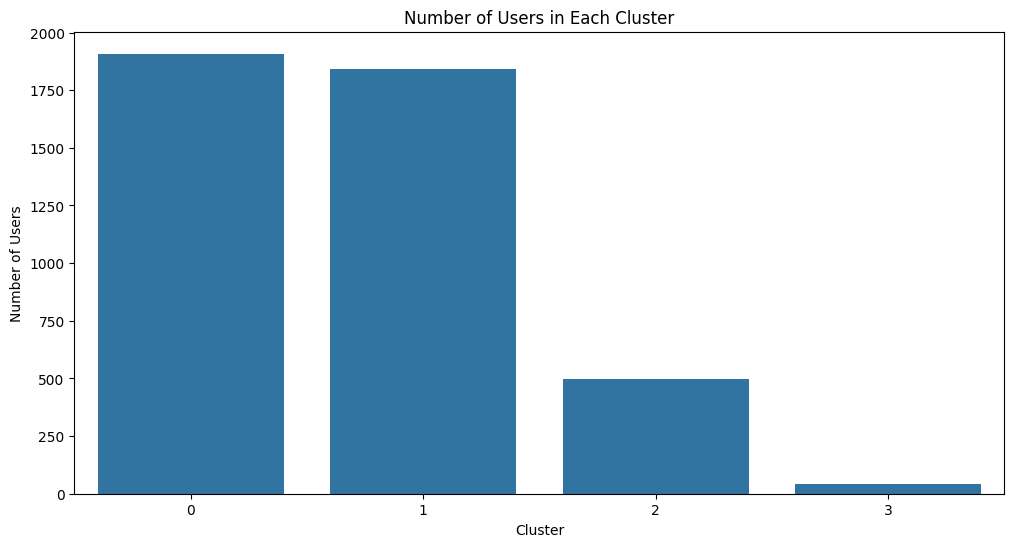

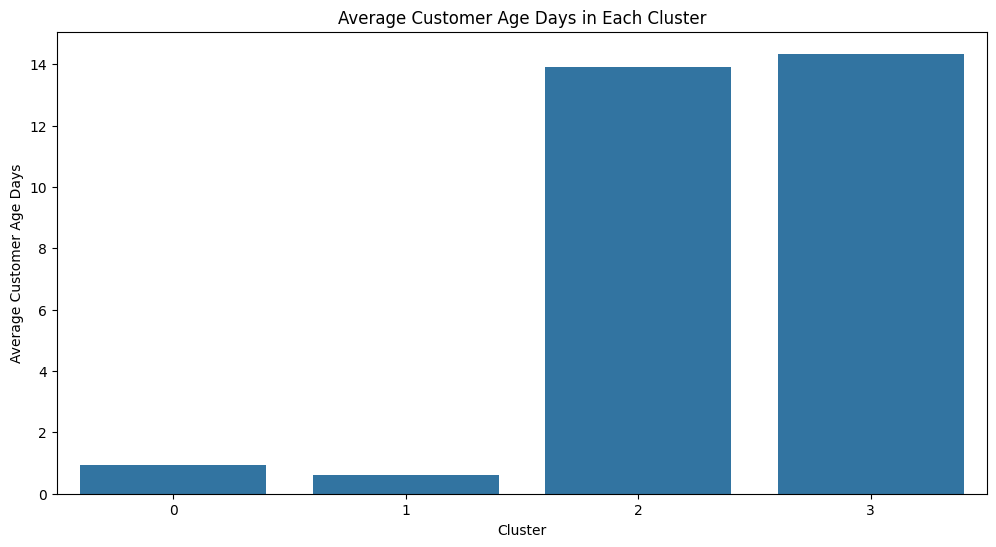

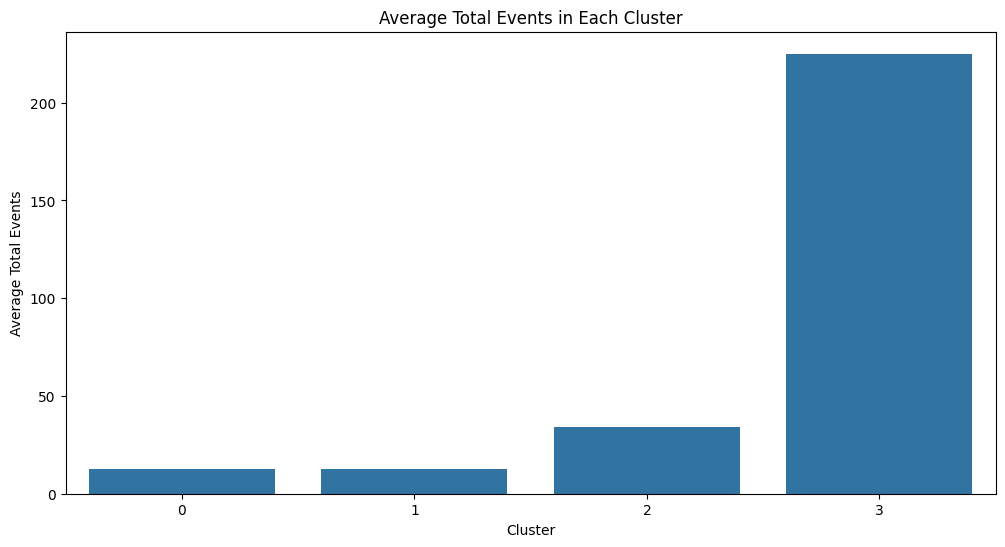

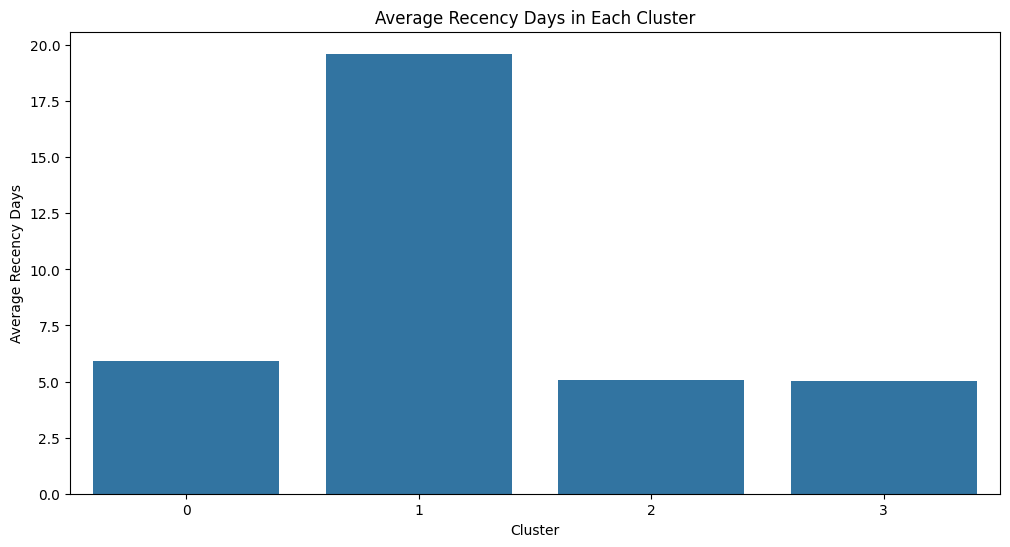

In [ ]:
user_event_times = merged_data.groupby('user_id')['event_time'].agg(['min', 'max']).reset_index()
user_event_times.rename(columns={'min': 'first_event_time', 'max': 'last_event_time'}, inplace=True)

# Calculate customer age (time between first and last event)
user_event_times['customer_age_days'] = (user_event_times['last_event_time'] - user_event_times['first_event_time']).dt.days

# Calculate total number of events per user
user_event_counts = merged_data.groupby('user_id')['event_time'].count().reset_index()
user_event_counts.rename(columns={'event_time': 'total_events'}, inplace=True)

# Calculate frequency of specific events
event_freq = merged_data.pivot_table(index='user_id', columns='event_name', aggfunc='size', fill_value=0).reset_index()

# Calculate recency (time since the last event)
current_time = merged_data['event_time'].max()
user_event_times['recency_days'] = (current_time - user_event_times['last_event_time']).dt.days

# Merge all metrics into a single DataFrame
user_metrics = user_event_times.merge(user_event_counts, on='user_id').merge(event_freq, on='user_id')


features = user_metrics[['customer_age_days', 'total_events', 'recency_days']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
user_metrics['cluster'] = kmeans.fit_predict(features_scaled)

# Calculate the average metrics for each cluster
cluster_summary = user_metrics.groupby('cluster').agg({
    'user_id': 'count',
    'customer_age_days': 'mean',
    'total_events': 'mean',
    'recency_days': 'mean'
}).reset_index()
cluster_summary.rename(columns={'user_id': 'count'}, inplace=True)

# Display the cluster summaries
display(cluster_summary)

# Visualize the clusters


plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='count', data=cluster_summary)
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

# Additional visualizations for key metrics within each cluster
metrics = ['customer_age_days', 'total_events', 'recency_days']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='cluster', y=metric, data=cluster_summary)
    plt.title(f'Average {metric.replace("_", " ").title()} in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {metric.replace("_", " ").title()}')
    plt.show()


The user segmentation has been performed using k-means clustering, and the users have been segmented into four distinct groups.

**Insights**

**Number of Users in Each Cluster**

* Cluster 0: This cluster has the highest number of users.
* Cluster 3: This cluster has the fewest users.
* Cluster 1 and Cluster 2: These clusters have a moderate number of users, with Cluster 1 having slightly more than Cluster 2.

**Average Customer Age in Each Cluster**

* Cluster 0: Users in this cluster have the shortest average customer age, indicating they are relatively new users.
* Cluster 3: Users in this cluster have the longest average customer age, indicating they are the most loyal and long-term users.
* Cluster 1 and Cluster 2: These clusters have users with moderate customer age, indicating they have been active for a while but not as long as Cluster 3.

**Average Total Events in Each Cluster**

* Cluster 0: Users in this cluster have the lowest average total events, indicating low engagement.
* Cluster 3: Users in this cluster have the highest average total events, indicating very high engagement.
* Cluster 1 and Cluster 2: Users in these clusters have moderate engagement, with Cluster 2 slightly more engaged than Cluster 1.

**Average Recency in Each Cluster**

* Cluster 0: Users in this cluster have the highest average recency, indicating that it has been a long time since their last activity. They are likely at risk of churn.
* Cluster 3: Users in this cluster have the lowest average recency, indicating they have interacted with the app recently and are actively engaged.
* Cluster 1 and Cluster 2: Users in these clusters have moderate recency, indicating they are somewhat engaged but not as recent as Cluster 3

## 5. Test Statistical Hypotheses

**Hypothesis 1: Difference in Conversion in Contact Information Views between bing and google**

Conversion in Contact Information Views:

* We define conversion as the event where a user views contact information (contacts_show).

Formulate Hypotheses:

**Null Hypothesis (H0):**  There is no difference in the conversion rate of contact information views between users who downloaded the app from bing and those who downloaded it from google.

**Alternative Hypothesis (H1):** There is a difference in the conversion rate of contact information views between users who downloaded the app from bing and those who downloaded it from google.

We will:

1. Calculate the conversion rate for each group (bing and google).
2. Since we are comparing the conversion rates between two groups (users who downloaded the app from bing vs. google), it is appropriate to use a chi-square test for independence. This is because we are dealing with categorical data and we want to see if there is a significant difference in the distribution of conversion events (contacts_show) between the two groups.

In [ ]:


# Filter the data for users from bing and google
bing_users = merged_data[merged_data['source'] == 'bing']
google_users = merged_data[merged_data['source'] == 'google']

# Calculate the number of unique users who performed the 'contacts_show' event for each group
bing_conversion_users = bing_users[bing_users['event_name'] == 'contacts_show']['user_id'].nunique()
google_conversion_users = google_users[google_users['event_name'] == 'contacts_show']['user_id'].nunique()

# Calculate the total number of unique users for each group
bing_total_users = bing_users['user_id'].nunique()
google_total_users = google_users['user_id'].nunique()

# Calculate the number of users who did not convert (did not perform 'contacts_show')
bing_no_conversion_users = bing_total_users - bing_conversion_users
google_no_conversion_users = google_total_users - google_conversion_users

# Debugging output :(
print(f"Bing: Total Users = {bing_total_users}, Conversions = {bing_conversion_users}, No Conversions = {bing_no_conversion_users}")
print(f"Google: Total Users = {google_total_users}, Conversions = {google_conversion_users}, No Conversions = {google_no_conversion_users}")

# Create a contingency table
conversion_table = pd.DataFrame({
    'Conversion': [bing_conversion_users, google_conversion_users],
    'No Conversion': [bing_no_conversion_users, google_no_conversion_users]
}, index=['Bing', 'Google'])

print("\nContingency Table:")
print(conversion_table)

# Perform chi-square test
chi2, p, dof, ex = stats.chi2_contingency(conversion_table)
print(f"\nChi-square Test:\nChi2: {chi2}\np-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in conversion rates between Bing and Google users.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates between Bing and Google users.")


Bing: Total Users = 1934, Conversions = 478, No Conversions = 1456
Google: Total Users = 1129, Conversions = 275, No Conversions = 854

Contingency Table:
        Conversion  No Conversion
Bing           478           1456
Google         275            854

Chi-square Test:
Chi2: 0.03181105473624245
p-value: 0.8584429794316509
Fail to reject the null hypothesis. There is no significant difference in conversion rates between Bing and Google users.


The conversion rates from those who donwloaded the app from Bing and Google are very similar, both around 24-25%

Chi-Square Test:

The chi-square statistic is very low (0.0318), indicating little difference between the observed conversion rates and what we would expect if there were no real difference.
The p-value (0.8584) is much higher than the typical significance level (0.05), meaning we fail to reject the null hypothesis.
Conclusion

Fail to Reject the Null Hypothesis:

Based on the chi-square test, we do not have enough evidence to conclude that there is a significant difference in the conversion rates between users who downloaded the app from Bing and those who downloaded it from Google.
This suggests that the source of the download (Bing vs. Google) does not significantly affect whether users view contact information.



## Conclusions and Recommendations

### Objective:

The primary objective of this project was to analyze user behavior within the "Trash to Treasure" mobile app and to segment users based on their interactions. This segmentation aims to enhance user engagement and retention through targeted strategies

### Key Steps:

**Data Loading and Preparation:**

* Successfully loaded and merged datasets.
* Standardized column names and handled event name inconsistencies.

**Exploratory Data Analysis (EDA):**

* Performed comprehensive EDA to understand event distribution, user activity, and source effectiveness.
* Identified key insights such as the dominance of the tips_show event and the significant user base acquired from Bing.

**User Segmentation:**

* Defined segmentation criteria based on customer age, total events, and recency.
* Applied k-means clustering to segment users into four distinct clusters.
* Analyzed the characteristics of each cluster to understand user behavior patterns.

**Hypothesis Testing:**

* Tested the hypothesis regarding the difference in conversion rates between users from Bing and Google.
* Conducted a one-sample t-test to compare the average number of events per user against a hypothetical value.

### Recommendations

**Improve User Onboarding:** Enhance the onboarding experience to better engage new users and reduce the initial drop-off rate.

**Engagement Strategies:** Develop strategies to increase user engagement, especially for users in Segment 0, to move them towards higher activity levels.

**Retention Programs:** Implement retention programs targeting users who have been active for a few days but are at risk of churn.

**Analyze High-Engagement Users:** Study the behavior of high-engagement users (Segment 1) to identify features or patterns that can be promoted to other users.

### Limitations and Implications

* Data Limitations: The analysis is limited to the available data, which may not capture all aspects of user behavior.

* Model Improvements: Future research could explore more advanced segmentation techniques and machine learning models to better understand user behavior.


**Ethical and Privacy Implications**

When working with user behavioral data, it is essential to address ethical and privacy considerations:

    * Data Anonymization: Ensure that user data is anonymized to protect user identities.
    * Informed Consent: Users should be informed about the data collection practices and consent to their data being used.
    * Data Security: Implement strong security measures to protect user data from unauthorized access.
    * Transparency: Be transparent about how user data is being used and provide users with the option to opt out.
